In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor



## DATA IMPORT

In [8]:
myfile= pd.read_csv(r"C:\Users\Owner\Downloads\weight_csv.csv")
myfile.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
myfile.shape

(159, 6)

In [10]:
myfile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [11]:
myfile.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## EDA

<AxesSubplot:ylabel='Weight'>

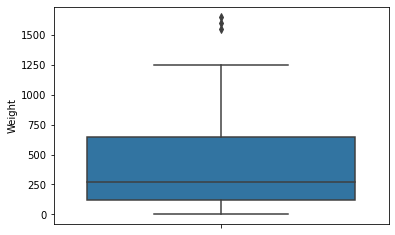

In [12]:
sns.boxplot(y="Weight",data = myfile)

<AxesSubplot:ylabel='Length1'>

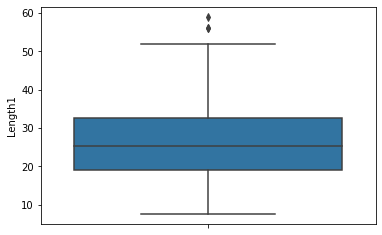

In [13]:
sns.boxplot(y="Length1",data =myfile)

<AxesSubplot:ylabel='Length2'>

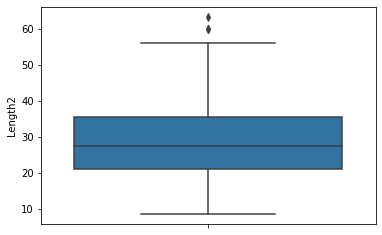

In [14]:
sns.boxplot(y="Length2",data=myfile)

<AxesSubplot:ylabel='Length3'>

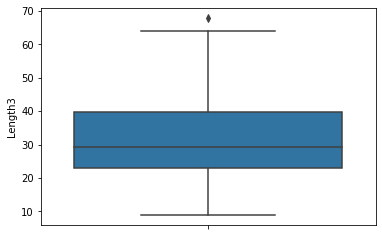

In [15]:
sns.boxplot(y="Length3",data=myfile)

<AxesSubplot:ylabel='Height'>

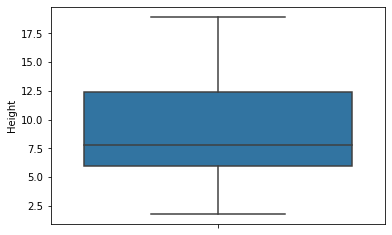

In [16]:
sns.boxplot(y="Height",data=myfile)

<AxesSubplot:ylabel='Width'>

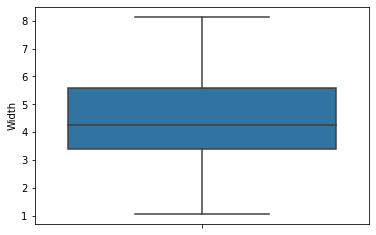

In [17]:
sns.boxplot(y="Width",data=myfile)

### Fixing outliers
###### for weight

In [18]:
q3 = myfile["Weight"].quantile(0.75)
q1=myfile.Weight.quantile(0.25)
IQR =q3-q1
lower = q1-1.5*IQR
upper =q3+1.5*IQR



In [19]:
myfile["Weight"]=np.where(myfile["Weight"]>upper,upper,myfile["Weight"])

<AxesSubplot:ylabel='Weight'>

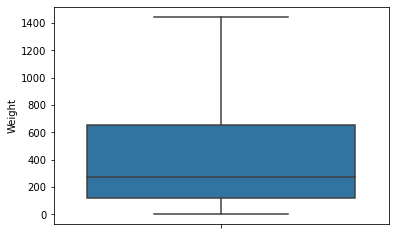

In [20]:
sns.boxplot(y="Weight",data=myfile)

###### FOR length 1,2,3

In [21]:
l1q3=myfile["Length1"].quantile(0.75)
l1q1 = myfile["Length1"].quantile(0.25)
l2q3=myfile["Length2"].quantile(0.75)
l2q1=myfile["Length2"].quantile(0.25)
l3q3=myfile["Length3"].quantile(0.75)
l3q1=myfile["Length3"].quantile(0.25)

l1IQR = l1q3-l1q1
l2IQR=l2q3-l2q1
l3IQR=l3q3-l3q1

l1upper = l1q3+1.5*l1IQR
l2upper=l2q3+1.5*l2IQR
l3upper=l3q3+1.5*l3IQR

In [22]:
myfile["Length1"] =np.where(myfile["Length1"]>l1upper,l1upper,myfile["Length1"])
myfile["Length2"] =np.where(myfile["Length2"]>l2upper,l2upper,myfile["Length2"])
myfile["Length3"] =np.where(myfile["Length3"]>l3upper,l3upper,myfile["Length3"])

<AxesSubplot:ylabel='Length1'>

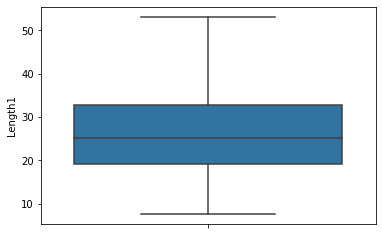

In [23]:
sns.boxplot(y="Length1",data=myfile)

<AxesSubplot:ylabel='Length2'>

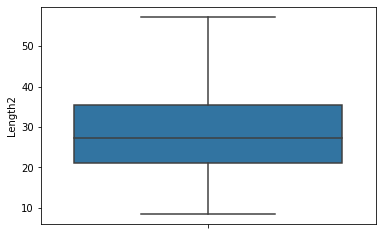

In [24]:
sns.boxplot(y="Length2",data=myfile)

<AxesSubplot:ylabel='Length3'>

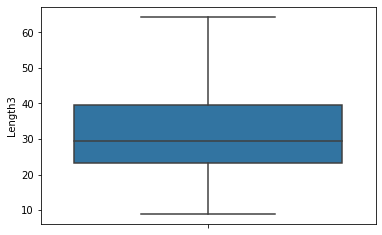

In [25]:
sns.boxplot(y="Length3",data=myfile)

In [26]:
myfile.isnull().sum()


Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## SPLITTING DATA IN TRAIN AND TEST

##### using sklearn we split 70% data in train and rest in test set.
##### using random state  will give the same training and test set every time on running the code.

In [27]:
myfile.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
X = myfile.drop("Weight",axis=1)
y = myfile[["Weight"]]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state = 120)

In [29]:
file= pd.concat([X_train,y_train],axis=1)
file.head()

,Length1,Length2,Length3,Height,Width,Weight
3,26.3,29.0,33.5,12.7300,4.4555,363.0
113,34.0,36.0,38.3,10.6091,6.7408,700.0
85,19.3,21.3,22.8,6.3840,3.5340,130.0
155,11.7,12.4,13.5,2.4300,1.2690,13.4
76,15.7,17.4,18.5,4.5880,2.9415,70.0


## CORRELATION

###### correlation matrix

In [30]:
file.corr()

,Length1,Length2,Length3,Height,Width,Weight
Length1,1.000000,0.999499,0.992873,0.645435,0.870861,0.908177
Length2,0.999499,1.000000,0.994657,0.659073,0.876785,0.910381
Length3,0.992873,0.994657,1.000000,0.708358,0.875092,0.917800
Height,0.645435,0.659073,0.708358,1.000000,0.801379,0.725061
Width,0.870861,0.876785,0.875092,0.801379,1.000000,0.883249
Weight,0.908177,0.910381,0.917800,0.725061,0.883249,1.000000


<AxesSubplot:>

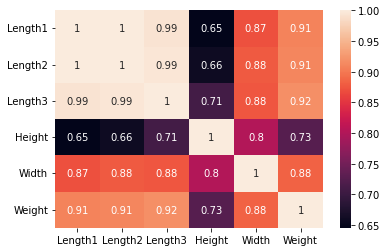

In [31]:
sns.heatmap(file.corr(),annot=True)

<AxesSubplot:xlabel='Length3', ylabel='Weight'>

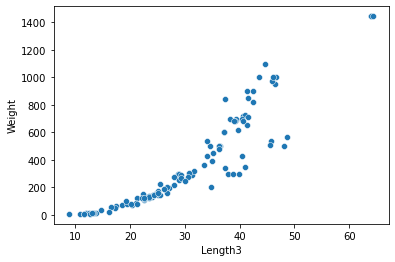

In [32]:
sns.scatterplot(x="Length3",y="Weight",data=file )
 

<AxesSubplot:xlabel='Length2', ylabel='Weight'>

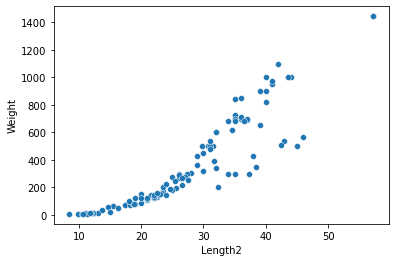

In [33]:
sns.scatterplot(x="Length2",y="Weight",data=file )


#### Length3 have  92% correlation with Weight of fish.
#### so, Length3 have high impact on weight.

## Multicolinearity with VIF

In [34]:
X1=file.drop(["Weight"],axis=1)
 
series= pd.Series([variance_inflation_factor(X1.values, i)
                   for i in range(X1.shape[1])],
                  index=X1.columns)
series

Length1    11053.803994
Length2    14067.147068
Length3     2213.639114
Height        47.526806
Width         84.824206
dtype: float64

In [ ]:
 variance_inflation_factor(X1.values,2)
    

 series.remove("Length2")

In [44]:
X1=file.drop(["Weight","Length2"],axis=1)

series= pd.Series([variance_inflation_factor(X1.values, i)
                   for i in range(X1.shape[1])],
                  index=X1.columns)
series

Length1    1804.065616
Length3    1814.503607
Height       47.268405
Width        75.882909
dtype: float64

In [45]:
X1=file.drop(["Weight","Length2","Length3" ],axis=1)

series= pd.Series([variance_inflation_factor(X1.values, i)
                   for i in range(X1.shape[1])],
                  index=X1.columns)
series

Length1    30.396138
Height     14.821382
Width      50.914244
dtype: float64

In [46]:
X1=file.drop(["Weight","Length2","Length3","Width" ],axis=1)

series= pd.Series([variance_inflation_factor(X1.values, i)
                   for i in range(X1.shape[1])],
                  index=X1.columns)
series

Length1    8.599281
Height     8.599281
dtype: float64

#### No collinearity indicates no multicollinearity.

## Model Building
* H0 = There is no linear relationship between       Length1, Height  and Weight .
* H1 = Ther is linear relationship between Length1,Height and Weight .

In [47]:
import statsmodels.formula.api as smf
model =smf.ols("Weight ~ Length1+Height",data =file ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     325.9
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.77e-46
Time:                        20:17:25   Log-Likelihood:                -695.92
No. Observations:                 111   AIC:                             1398.
Df Residuals:                     108   BIC:                             1406.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -459.8684     34.854    -13.194      0.000    -528.956    -390.781
Length1       26.0360      1.639     15.885      0.000      22.787      29.285
Height        19.0743      3.806      5.012      0.000      11.531      26.618
==============================================================================
Omnibus:                        4.074   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.524
Skew:                           0.419   Prob(JB):                        0.172
Kurtosis:                       3.241   Cond. No.                         82.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is linear relationship between Length1 ,Height and Weight.
* We reject H0.
* The accuracy of model is 86% which is a good fit model.
* y = -459.868 + 26**Length1 + 19 **Height.

## MUlticollinearity with VIF

In [ ]:
X2 = file.loc[:,["Length1","Height"]]

series = pd.Series([variance_inflation_factor(X2.values,i) 
                    for i in range(X2.shape[1])],
                     index = X2.columns)



In [ ]:
series

## Assumptions of model

* Linearity.
* Normality.
* Homoscedasicity.
* Model error to be independently Distributed.

In [ ]:
file.head()

## Linearity

In [55]:
file["Fitted_value"] = model.fittedvalues
file["Residual"] = model.resid
file.head()

,Length1,Length2,Length3,Height,Width,Weight,Fitted_value,Residual
3,26.3,29.0,33.5,12.7300,4.4555,363.0,467.692602,-104.692602
113,34.0,36.0,38.3,10.6091,6.7408,700.0,627.714864,72.285136
85,19.3,21.3,22.8,6.3840,3.5340,130.0,164.395642,-34.395642
155,11.7,12.4,13.5,2.4300,1.2690,13.4,-108.897258,122.297258
76,15.7,17.4,18.5,4.5880,2.9415,70.0,36.408824,33.591176


<AxesSubplot:xlabel='Length1', ylabel='Weight'>

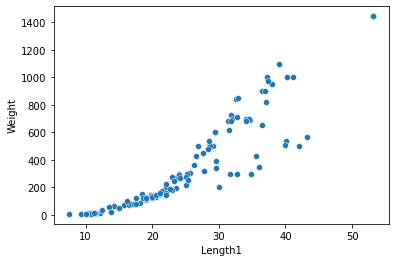

In [56]:
sns.scatterplot(x="Length1",y="Weight",data = file)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

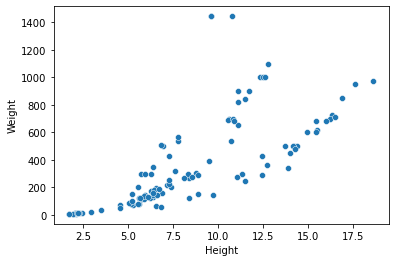

In [49]:
sns.scatterplot(x="Height",y="Weight",data = file)

### Homoscedasicity

<AxesSubplot:xlabel='Fitted_value', ylabel='Residual'>

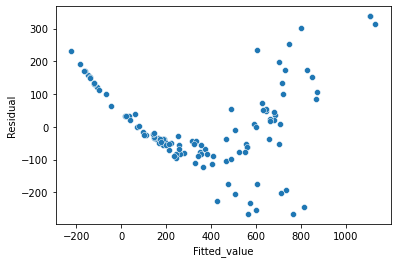

In [57]:
sns.scatterplot(x="Fitted_value",y="Residual",data = file)

### Normality

C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Owner\AppData\Local\Temp/ipykernel_1988/1464320648.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


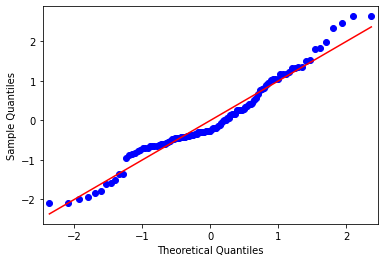

In [58]:
import statsmodels.api as sm
plt = sm.qqplot(file.Residual,fit=True ,line ='s')
plt.show()

### Models error are independently identified.

In [ ]:
file["Residual"].plot.hist()

# Prediction on Test Data

In [60]:
file2 = pd.concat([X_test,y_test],axis=1)
file2.head()

,Length1,Length2,Length3,Height,Width,Weight
18,30.9,33.5,38.6,15.6330,5.1338,610.0
157,13.2,14.3,15.2,2.8728,2.0672,19.7
30,35.0,38.5,44.1,18.0369,6.3063,920.0
69,21.2,23.0,25.8,10.3458,3.6636,200.0
118,36.6,39.0,41.3,12.4313,7.3514,820.0


In [61]:
file2["Predicted"] = model.predict(file2)
file2.head()


,Length1,Length2,Length3,Height,Width,Weight,Predicted
18,30.9,33.5,38.6,15.6330,5.1338,610.0,642.830583
157,13.2,14.3,15.2,2.8728,2.0672,19.7,-61.397240
30,35.0,38.5,44.1,18.0369,6.3063,920.0,795.430622
69,21.2,23.0,25.8,10.3458,3.6636,200.0,289.432369
118,36.6,39.0,41.3,12.4313,7.3514,820.0,730.165471


##### accuracy for Test

In [62]:
from sklearn.metrics import r2_score

r2= r2_score(file2.Weight,file2.Predicted)
print("R2 score for test is : ",r2)

R2 score for test is :  0.9006059801621475


In [63]:
from sklearn.metrics import r2_score

r2= r2_score(file.Weight,file.Fitted_value)
print("R2 score for train  model is : ",r2)

R2 score for train  model is :  0.8578506762162764


#### performance on Test dataset is good fit as Train model.

### Prediction on live Data.

In [64]:
df = {"Fish":pd.Series(["Rawas","Salmon","Basa"]),
        "Length1":[10,20,30],
          "Length2":[20,30,40],
             "Length3":[12,25,36],
               "Height":[3.73,6.65,14.34],
                 "Width":[2.4,6.7,5.4]}
fd =pd.DataFrame(df)
fd

,Fish,Length1,Length2,Length3,Height,Width
0,Rawas,10,20,12,3.73,2.4
1,Salmon,20,30,25,6.65,6.7
2,Basa,30,40,36,14.34,5.4


In [ ]:
fd["Predict_Weight "] =np.round(model.predict(fd),2)
fd

In [ ]:
 fd.drop(['Predict'],axis=1)

###### SO,we can easily predict the weight of fish..